<a href="https://colab.research.google.com/github/DrakeCS167Fall22/cs167fall22project2-GavinEldridge/blob/main/Copy_of_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Gavin Eldridge

Proposed Points (out of 25): 25

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

The data being used will be data from every player's rookie season from the 1980 season to the 2020 season including non-drafted players. The data includes averages of all recorded stats along with Team, year, age, and conference in which the player plays, along with a target variable which tells us 1 if the player has played 3 or more seasons and a 0 if not. I found this data on the website Kaggle and will be using this data to create a model that can predict if a player will play 3 or more seasons in the NBA. Hopefully this model can go on from this and be used to predict a players total longevity.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

The data preparation for this Dataset was very easy as the data came completely filled out with no null values. However, there was a lot of attributes that the data came with so I decided to drop a lot of columns that were either unneccessary or repetitive. For example, Team and Conference were dropped 

In [35]:
# load and prepare your data here
from google.colab import drive
drive.mount('/content/drive')
import sklearn
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
import numpy as np


# load data
nba_data = pd.read_csv('/content/drive/MyDrive/CS167datasets/NBA_Rookies.csv')

A = nba_data.copy()

A.drop(columns= [A.columns[0],'Player','Team', 'Conf', 'Career', 'MP', 'PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA','ORB', 'DRB', 'TRB', 'STL','BLK', 'TOV', 'PF', 'FTpg','ORBpg','DRBpg'], inplace = True)

print(A.head(10))
print(A.dtypes)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Year   Age  Games    FG%    3P%    FT%    AST   MPpg  PTSpg  FGpg  3Ppg  \
0  1979  22.0   67.0  0.450  0.000  0.673   28.0  10.84    4.7  1.82  0.00   
1  1980  23.0   16.0  0.493  0.421  0.718   31.0  14.69   11.3  4.50  0.50   
2  1979  23.0   82.0  0.474  0.406  0.836  370.0  36.04   21.3  8.45  0.71   
3  1980  23.0   13.0  0.462  0.000  0.615    2.0   9.62    4.3  1.85  0.00   
4  1979  22.0   82.0  0.452  0.400  0.782  252.0  24.72    8.4  3.35  0.02   
5  1979  22.0   82.0  0.547  0.000  0.797  165.0  38.41   21.7  8.11  0.00   
6  1979  23.0   66.0  0.469  0.000  0.806   84.0  13.70    5.5  1.95  0.00   
7  1979  24.0   75.0  0.495  0.000  0.733   80.0  15.23    5.7  2.43  0.00   
8  1979  28.0   24.0  0.358  0.222  0.571   12.0   6.67    2.8  1.21  0.08   
9  1979  23.0    4.0  0.500  0.000  1.000    7.0   7.00    1.5  0.50  0.00   

   TRBpg  AS

# 3. Research

Put your code and your experiments here.

In [36]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

target = 'Target'

predictors = A.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
        train_test_split(A[predictors], A[target], test_size = 0.2, random_state=41)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

0.6836555360281195
0.7100175746924429
0.7311072056239016
0.7451669595782073
0.7328646748681898
0.7451669595782073
0.7381370826010545
0.7451669595782073


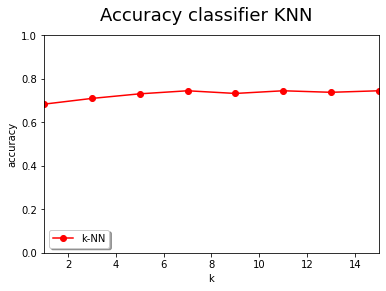

In [70]:
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


ck_vals = [1,3,5,7,9,11,13,15]
ckNN_accuracies = []

for k in ck_vals:
    neighc = neighbors.KNeighborsClassifier(n_neighbors = k) ### Don't miss this! Doing Regression here!!
    # fit (train) the model to the data
    neighc.fit(train_data_normalized, train_sln)
    # use the trained model to get predictions from our test_data
    predictionsc = neighc.predict(test_data_normalized)
    current_accuracy = metrics.accuracy_score(test_sln ,predictionsc)
    ckNN_accuracies.append(current_accuracy)
    print(current_accuracy)


plt.suptitle('Accuracy classifier KNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(ck_vals,ckNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([1,15,0,1])

plt.show()

0.7311072056239016
0.7451669595782073
0.7398945518453427
0.7469244288224957
0.7574692442882249
0.7592267135325131
0.7662565905096661
0.7592267135325131


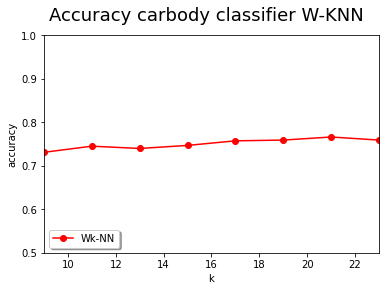

In [57]:
cwk_vals = [9,11,13,15,17,19,21,23]
cwkNN_accuracies = []

for k in cwk_vals:
    neighwc = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance') ### Don't miss this! Doing Regression here!!
    # fit (train) the model to the data
    neighwc.fit(train_data_normalized, train_sln)
    # use the trained model to get predictions from our test_data
    predictionswc = neighwc.predict(test_data_normalized)
    current_accuracy = metrics.accuracy_score(test_sln ,predictionswc)
    cwkNN_accuracies.append(current_accuracy)
    print(current_accuracy)


plt.suptitle('Accuracy carbody classifier W-KNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(cwk_vals,cwkNN_accuracies,'ro-',label='Wk-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([9,23,0.5,1])

plt.show()

0.7662565905096661
0.7627416520210897
0.7644991212653779
0.7592267135325131
0.7697715289982425
0.7609841827768014


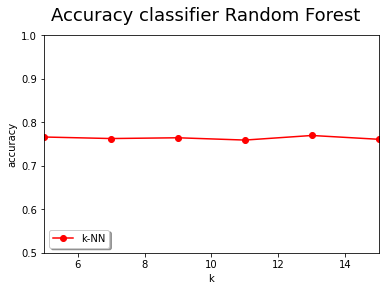

In [69]:
#Random Forest
rf_vals = [5,7,9,11,13,15]
R_forest_accuracies = []
for n in rf_vals:
    forest = RandomForestClassifier(random_state = 0, n_estimators=100, min_samples_leaf= n)
    forest.fit(train_data_normalized, train_sln)
    predictions = forest.predict(test_data_normalized)
    current_accuracy = metrics.accuracy_score(test_sln ,predictions)
    R_forest_accuracies.append(current_accuracy)
    print(current_accuracy)

plt.suptitle('Accuracy classifier Random Forest',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(rf_vals,R_forest_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([5,15,0.5,1])

plt.show()


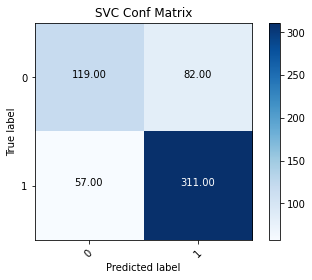

accuracy: 0.7557117750439367
accuracy: 0.7592267135325131


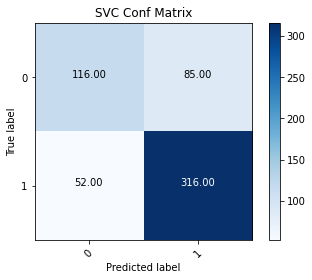

In [65]:
#SVC
from sklearn.svm import SVC
clf = SVC(kernel = "linear", decision_function_shape= 'ovo')
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)
import itertools

cm=metrics.confusion_matrix(test_sln,predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('SVC Conf Matrix')
plt.colorbar()
plt.xticks([0,1], perc.classes_,rotation=45)
plt.yticks([0,1], perc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print("accuracy:", metrics.accuracy_score(test_sln, predictions))

clf2 = SVC()
clf2.fit(train_data_normalized,train_sln)
predictions2 = clf2.predict(test_data_normalized)
print("accuracy:", metrics.accuracy_score(test_sln, predictions2))

cm=metrics.confusion_matrix(test_sln,predictions2)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('SVC Conf Matrix')
plt.colorbar()
plt.xticks([0,1], perc.classes_,rotation=45)
plt.yticks([0,1], perc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Perceptron accuracy: 0.6977152899824253



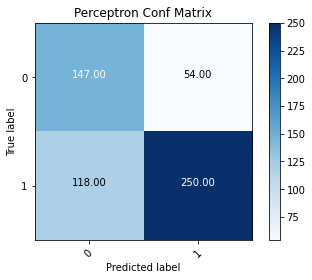

In [73]:
#perceptron
from sklearn.linear_model import Perceptron
#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

perc = Perceptron( )
perc.fit(train_data_normalized,train_sln)
perc_predictions = perc.predict(test_data_normalized)

#output accuracy
print("Perceptron accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
import itertools

cm=metrics.confusion_matrix(test_sln,perc_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Perceptron Conf Matrix')
plt.colorbar()
plt.xticks([0,1], perc.classes_,rotation=45)
plt.yticks([0,1], perc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
print()




SGD accuracy: 0.7504393673110721
None


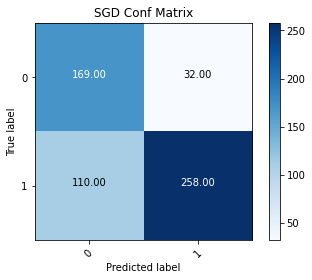

In [67]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(early_stopping= True)
sgd.fit(train_data_normalized,train_sln)
SGD_predictions = sgd.predict(test_data_normalized)

cm=metrics.confusion_matrix(test_sln,SGD_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('SGD Conf Matrix')
plt.colorbar()
plt.xticks([0,1], perc.classes_,rotation=45)
plt.yticks([0,1], perc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(print("SGD accuracy:", metrics.accuracy_score(test_sln, SGD_predictions)))

In [78]:
#running PCA for best model
from sklearn.decomposition import PCA

extractor = PCA(n_components=3, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data_normalized)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data_normalized)
test_transformed = extractor.transform(test_data_normalized)

this is the variance/importance of each component
[0.46577384 0.1281964  0.08480578]


0.7258347978910369
0.7240773286467487
0.7293497363796133
0.7363796133567663
0.7311072056239016
0.7363796133567663


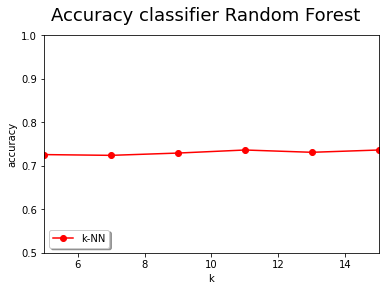

In [79]:
#Random Forest
rf_vals = [5,7,9,11,13,15]
R_forest_accuracies = []
for n in rf_vals:
    forest = RandomForestClassifier(random_state = 0, n_estimators=100, min_samples_leaf= n)
    forest.fit(train_transformed, train_sln)
    predictions = forest.predict(test_transformed)
    current_accuracy = metrics.accuracy_score(test_sln ,predictions)
    R_forest_accuracies.append(current_accuracy)
    print(current_accuracy)

plt.suptitle('Accuracy classifier Random Forest',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(rf_vals,R_forest_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([5,15,0.5,1])

plt.show()

accuracy: 0.7346221441124781


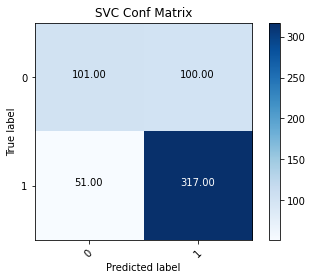

In [81]:
clf2 = SVC()
clf2.fit(train_transformed,train_sln)
predictions2 = clf2.predict(test_transformed)
print("accuracy:", metrics.accuracy_score(test_sln, predictions2))

cm=metrics.confusion_matrix(test_sln,predictions2)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('SVC Conf Matrix')
plt.colorbar()
plt.xticks([0,1], perc.classes_,rotation=45)
plt.yticks([0,1], perc.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

For this project I used many of the classifying models we used in class to find out which model would be the best for predicting. I used K-nn, W-knn, Support Vectors, Stochastic Gradient Descent, Perceptron, and Random Forests. In running these models, Support vector and Random forests proved to be the best models but by only a small margin. One thing I found interesting throughout this experiment is that no matter the model, the accuracy pretty much stayed the same within the 70% - 75% range. Even when running the Principal Component Analysis the SVC and Random Forests remained almost the same but actually decreased in performance. I think the reason the models performed rather poorly and similarly is because even though a player's performance largely contributes to his longevity in the NBA, there are a lot of other reasons that can affect this. For example, teams needs for their player personnel along with who else is on that specific team can affect longevity. Also injuries and off the court issues can also come into play. Along with that, style of play has a big effect on the effectiveness of a certain player. In the end, I've come to realize that there are other factors that contribute to how long a player stays in the league besides just performance.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

There were not many bumps in the road. At the beginning I was struggling to decide what attributes to use to test my model. This is because for most stats they had the total stat along with that stat per game. Or, for shooting stats specifically, the dataset had field goals made, field goals attempted, field goal percentage, and then field goals per game. I figured there was not much need to have four categories that are pretty much the same thing. I chose to use per game stats along with having games played was better than the totals because the totals for a player who got hurt and had to sit out wouldn't necessarily be reflective of their caliber. The last bump would be just trying to get past the boundary of a 75% accuracy. I tried tuning all the models and even changing the attributes used in the data but in the end it was just getting worse so I kept my data how it was originally. 